# Simple Linear Regression

## Simple Linear Regression Using StatsModel Library

In [9]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading and Understanding of the data

In [4]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualizing Data

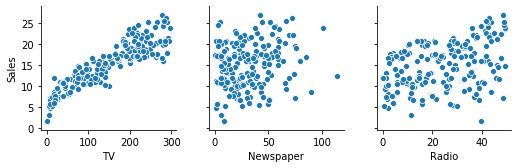

In [10]:
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', kind = 'scatter')


1. TV has fairly linear relationship with sales
2. Newspaper and Radio are not clearly linearly realted with sales

(4.0, 0.0)

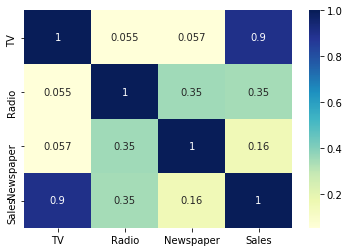

In [21]:
# Checking linear correlation between between variable
import seaborn as sns
df_corr = df.corr()
ax = sns.heatmap(df_corr, cmap = 'YlGnBu', annot=True) #notation: "annot" not "annote"
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

As we can see sales has higher correlation coefficient with TV, where as radio and news paper are weakely correlated with Sales.

### Applying liear regression 

In [22]:
X = df['TV']
y = df['Sales']

In [23]:
# spliting data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size= 0.7, test_size= 0.3, random_state= 100)


In [24]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [25]:
y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

#### Building linear model

In [26]:
import statsmodels.api as sm
# Adding constant term into linear model
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [27]:
# Fitting regression model to data
lr = sm.OLS(y_train, X_train_sm).fit()

In [28]:
lr.params

const    6.948683
TV       0.054546
dtype: float64

We found constant(intercept) term to be 6.9486 and coefficient to be 0.05454

In [29]:
# Looking for model parameter and other statistical points
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 11 May 2022   Prob (F-statistic):           1.52e-52
Time:                        18:19:57   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Looking at few statistical summary**
1. Since p-values for coefficiets are close to zero, coefficients are statistically significant
2. R-Squared value for is 0.816, which is fairly good for model, which means model is able to explain 81.6% of variance in data.
3. probability of F- Statistics is close to zero means model is not just fitting to datza by chance, there is actual linear relation 
4. Models turn out to be $ Sales = 6.9487 + 0.54 \times TV $

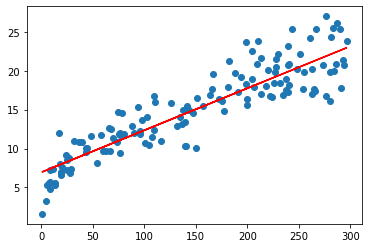

In [31]:
# Ploting actual values and predicted values on same plot
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.9487 + 0.054*X_train, 'r')
plt.show()

### Residual analysis
This is required to validate assumptions related to linear regression

#### 1. Distribution of the error terms
Error terms to be **Normally Distributed**

In [32]:
y_train_pred = lr.predict(X_train_sm)
# finding residual
res = (y_train - y_train_pred)

Text(0.5, 0, 'Residual')

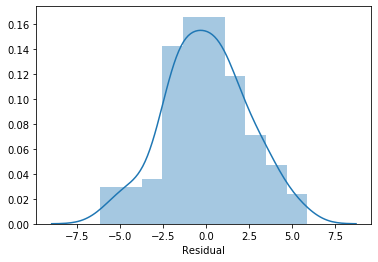

In [35]:
sns.distplot(res)
plt.xlabel('Residual')

1. By looking above plot we can see that errors are normally distributed, and this is required varification for Linear Regression
2. We can also see taht mean of the above distribution is 0

#### Predicting on test set

In [36]:
# Adding constant terms to X_test
X_test_sm = sm.add_constant(X_test)
# predicting on X_test_sm
y_pred = lr.predict(X_test_sm)

In [37]:
y_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64